In [152]:
import numpy as np
import pandas as pd

In [153]:
dataset_path = './../../../dataset.csv'

In [154]:
df = pd.read_csv(dataset_path, delimiter=';')
df = df.drop_duplicates()
df.head()

,product,category,quantity,discount,value,buy_date,is_holiday
0,Macarrão,Massas,10.0,0.25,95.01,2021-11-25,n
1,Chocolate,Doce,7.0,0.09,60.91,2020-03-18,n
2,Refrigerante,Bebida,3.0,0.42,46.47,2023-03-23,n
3,Cerveja,Bebida,9.0,0.49,42.19,2019-01-15,n
4,Sabão em Pó,Limpeza,8.0,0.25,71.26,2021-07-11,n


In [155]:
df.describe()

,quantity,discount,value
count,1050.000000,1050.000000,1050.000000
mean,5.649524,0.251495,52.836981
std,2.888626,0.145578,27.406852
min,1.000000,0.000000,5.020000
25%,3.000000,0.130000,29.390000
50%,6.000000,0.250000,52.905000
75%,8.000000,0.380000,76.442500
max,10.000000,0.500000,99.940000


In [156]:
df.dtypes

product        object
category       object
quantity      float64
discount      float64
value         float64
buy_date       object
is_holiday     object
dtype: object

In [157]:
df = pd.get_dummies(df)
df.head()

,quantity,discount,value,product_Arroz,product_Biscoito,product_Cerveja,product_Chocolate,product_Condicionador,product_Detergente,product_Feijão,...,buy_date_2023-12-10,buy_date_2023-12-11,buy_date_2023-12-13,buy_date_2023-12-16,buy_date_2023-12-18,buy_date_2023-12-26,buy_date_2023-12-29,is_holiday_n,is_holiday_s,is_holiday_y
0,10.0,0.25,95.01,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,7.0,0.09,60.91,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3.0,0.42,46.47,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,9.0,0.49,42.19,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,8.0,0.25,71.26,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [159]:
# y = df['value']
# X = df.drop(columns=['value'])

X = df[[column for column in df.columns if column.startswith('product_') or column == 'discount']]
y = df['value']

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [161]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE (Erro Absoluto Médio): {mae}')
print(f'MSE (Erro Quadrático Médio): {mse}')
print(f'R² (Coeficiente de Determinação): {r2}')


MAE (Erro Absoluto Médio): 23.66697779078449
MSE (Erro Quadrático Médio): 761.4422090695726
R² (Coeficiente de Determinação): -0.0009214239669002033


In [162]:
import matplotlib.pyplot as plt

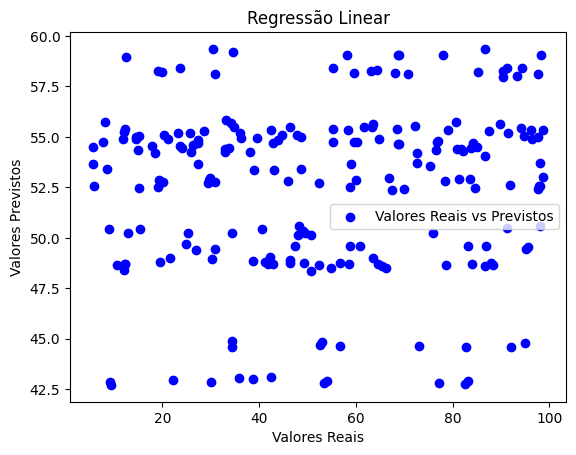

In [163]:
plt.scatter(y_test, y_pred, color='blue', label='Valores Reais vs Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Regressão Linear')
plt.legend()
plt.show()